### Introduction
Notebook to check if there are correlations that can be drawn between ETFs that track various market indicies in the US with that of COVID-19 confirmed cases.

John Hopkins data will be used along with yfinance for closing prices.

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Aug 10 10:42:09 2018

@author: Bryan Tarras (modified), Rosario (original)
"""

import pandas as pd
import numpy as np
import math
pd.core.common.is_list_like = pd.api.types.is_list_like #datareader problem probably fixed in next version of datareader
from pandas_datareader import data as pdr
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
#import detrendPrice
#import WhiteRealityCheckFor1

import seaborn as sns

import yfinance as yf
#yf.pdr_override() # <== that's all it takes :-)

from datetime import datetime

In [2]:
stock_list = ['XLU','XLV','DIA','GDX','XLE','XLY','VNQ','XLK','XLF','XLP','FSTA','IHI','XRT','RXI','IYW','VIS','KBE','SIL','FNCL','XAR','FXU','SHY']

In [3]:
'''
#Example1
# download dataframe
#data = pdr.get_data_yahoo("SPY", start="2017-01-01", end="2017-04-30")
# download Panel
#data2 = pdr.get_data_yahoo(["SPY", "IWM"], start="2017-01-01", end="2017-04-30")
#example2
#start = datetime.datetime(2017, 1, 1)
#symbol = 'SPY'
#data = pdr.get_data_yahoo(symbol, start=start, end=end)
#data.to_csv("C:\\Users\\Rosario\\Documents\\NeuralNetworksMachineLearning\\LSTMReturnPrediction\\data\\YahooSPY.csv")

#start_date=datetime.datetime(2003, 1, 1)
start_date_training=datetime(2020, 1, 16)
#end_date= datetime.datetime.now()
end_date_training=datetime(2020, 3, 19)

stock_str = ""
for i in range(len(stock_list)):
    stock_str  = stock_str + stock_list[i] + "."


#Below is for AP training data download    
main_df = pd.DataFrame()

for stock in range(len(stock_list)):
     df = pdr.get_data_yahoo(stock_list[stock], start=start_date_training, end=end_date_training)
     df.drop(['Close','High', 'Low' , 'Open', 'Volume'], axis=1, inplace=True)
     df.rename(columns={'Adj Close': stock_list[stock]}, inplace=True)
     if main_df.empty:
         main_df = df
     else:
        main_df = main_df.join(df) 
    

main_df.to_csv(stock_str+"AP_train.csv")


#Below is for normal prices training data download 
main_df = pd.DataFrame()

for stock in range(len(stock_list)):
     df = pdr.get_data_yahoo(stock_list[stock], start=start_date_training, end=end_date_training)
     df.drop(['Adj Close','High', 'Low' , 'Open', 'Volume'], axis=1, inplace=True)
     df.rename(columns={'Close': stock_list[stock]}, inplace=True)
     if main_df.empty:
         main_df = df
     else:
        main_df = main_df.join(df) 

main_df.to_csv(stock_str+"train.csv")
'''

'\n#Example1\n# download dataframe\n#data = pdr.get_data_yahoo("SPY", start="2017-01-01", end="2017-04-30")\n# download Panel\n#data2 = pdr.get_data_yahoo(["SPY", "IWM"], start="2017-01-01", end="2017-04-30")\n#example2\n#start = datetime.datetime(2017, 1, 1)\n#symbol = \'SPY\'\n#data = pdr.get_data_yahoo(symbol, start=start, end=end)\n#data.to_csv("C:\\Users\\Rosario\\Documents\\NeuralNetworksMachineLearning\\LSTMReturnPrediction\\data\\YahooSPY.csv")\n\n#start_date=datetime.datetime(2003, 1, 1)\nstart_date_training=datetime(2020, 1, 16)\n#end_date= datetime.datetime.now()\nend_date_training=datetime(2020, 3, 19)\n\nstock_str = ""\nfor i in range(len(stock_list)):\n    stock_str  = stock_str + stock_list[i] + "."\n\n\n#Below is for AP training data download    \nmain_df = pd.DataFrame()\n\nfor stock in range(len(stock_list)):\n     df = pdr.get_data_yahoo(stock_list[stock], start=start_date_training, end=end_date_training)\n     df.drop([\'Close\',\'High\', \'Low\' , \'Open\', \'Volum

In [4]:
dfP = pd.read_csv('XLU.XLV.DIA.GDX.XLE.XLY.VNQ.XLK.XLF.XLP.FSTA.IHI.XRT.RXI.IYW.VIS.KBE.SIL.FNCL.XAR.FXU.SHY.train.csv', parse_dates=['Date'])
dfAP = pd.read_csv('XLU.XLV.DIA.GDX.XLE.XLY.VNQ.XLK.XLF.XLP.FSTA.IHI.XRT.RXI.IYW.VIS.KBE.SIL.FNCL.XAR.FXU.SHY.AP_train.csv', parse_dates=['Date'])

dfP = dfP.sort_values(by='Date')
dfAP = dfAP.sort_values(by='Date')
dfP.set_index('Date', inplace = True)
dfAP.set_index('Date', inplace = True)

In [5]:
dfP.tail()

,XLU,XLV,DIA,GDX,XLE,XLY,VNQ,XLK,XLF,XLP,...,XRT,RXI,IYW,VIS,KBE,SIL,FNCL,XAR,FXU,SHY
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-13,57.669998,90.660004,232.110001,19.00,32.189999,102.300003,79.480003,84.190002,23.049999,56.610001,...,32.740002,97.500000,210.369995,117.440002,31.230000,18.610001,32.830002,80.629997,25.530001,86.279999
2020-03-16,51.119999,81.720001,202.490005,22.49,27.809999,89.339996,65.389999,72.559998,19.889999,52.770000,...,28.660000,85.610001,181.710007,103.980003,27.200001,21.030001,28.490000,69.900002,22.830000,86.419998
2020-03-17,57.660000,86.849998,213.470001,25.50,28.000000,92.779999,69.169998,77.500000,20.969999,57.220001,...,30.139999,88.559998,194.130005,107.949997,28.730000,23.330000,29.780001,73.489998,25.190001,86.220001
2020-03-18,55.150002,83.970001,199.389999,19.68,23.980000,87.449997,62.590000,74.580002,19.190001,55.750000,...,27.750000,82.779999,187.630005,99.410004,25.540001,20.530001,27.219999,66.459999,23.559999,86.110001
2020-03-19,51.939999,82.250000,201.309998,21.27,25.610001,90.500000,62.810001,74.849998,19.610001,53.889999,...,29.270000,85.040001,189.460007,100.730003,27.190001,20.500000,27.740000,68.349998,23.240000,86.260002


In [6]:
COVID_19_C = pd.read_csv('time_series_19-covid-Confirmed.csv')
COVID_19_D = pd.read_csv('time_series_19-covid-Deaths.csv')
COVID_19_R = pd.read_csv('time_series_19-covid-Recovered.csv')

In [7]:
COVID_19_C = COVID_19_C.drop(labels=None, axis=1, columns=('Province/State'))
COVID_19_C = COVID_19_C.drop(labels=None, axis=1, columns=('Lat'))
COVID_19_C = COVID_19_C.drop(labels=None, axis=1, columns=('Long'))
COVID_19_D = COVID_19_D.drop(labels=None, axis=1, columns=('Province/State'))
COVID_19_D = COVID_19_D.drop(labels=None, axis=1, columns=('Lat'))
COVID_19_D = COVID_19_D.drop(labels=None, axis=1, columns=('Long'))
COVID_19_R = COVID_19_R.drop(labels=None, axis=1, columns=('Province/State'))
COVID_19_R = COVID_19_R.drop(labels=None, axis=1, columns=('Lat'))
COVID_19_R = COVID_19_R.drop(labels=None, axis=1, columns=('Long'))

In [8]:
COVID_19_C = COVID_19_C.sort_values(by='Country/Region')
COVID_19_D = COVID_19_D.sort_values(by='Country/Region')
COVID_19_R = COVID_19_R.sort_values(by='Country/Region')

In [9]:
COVID_19_C.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
26,Afghanistan,0,0,0,0,0,0,0,0,0,...,7,7,11,16,21,22,22,22,24,24
95,Albania,0,0,0,0,0,0,0,0,0,...,23,33,38,42,51,55,59,64,70,76
29,Algeria,0,0,0,0,0,0,0,0,0,...,24,26,37,48,54,60,74,87,90,139
60,Andorra,0,0,0,0,0,0,0,0,0,...,1,1,1,1,2,39,39,53,75,88
470,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2


In [10]:
COVID_19_C = COVID_19_C.T
COVID_19_D = COVID_19_D.T
COVID_19_R = COVID_19_R.T

COVID_19_C.columns = COVID_19_C.iloc[0]
COVID_19_D.columns = COVID_19_D.iloc[0]
COVID_19_R.columns = COVID_19_R.iloc[0]

COVID_19_C = COVID_19_C.drop([COVID_19_C.index[0]])
COVID_19_D = COVID_19_D.drop([COVID_19_D.index[0]])
COVID_19_R = COVID_19_R.drop([COVID_19_R.index[0]])

In [11]:
COVID_19_D.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,United Kingdom,United Kingdom,United Kingdom,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
3/17/20,0,1,4,0,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3/18/20,0,2,7,0,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3/19/20,0,2,9,0,0,0,3,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3/20/20,0,2,11,0,0,0,3,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3/21/20,0,2,15,0,0,0,4,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### This code below is Breaking my columns
I need to change the columns to become first row

In [12]:
#COVID_19_C.columns = [list(range(len(COVID_19_C.columns))), COVID_19_C.columns]
#COVID_19_D.columns = [list(range(len(COVID_19_D.columns))), COVID_19_D.columns]
#COVID_19_R.columns = [list(range(len(COVID_19_R.columns))), COVID_19_R.columns]

In [13]:
COVID_19_C_2 = pd.DataFrame(np.vstack([COVID_19_C.columns, COVID_19_C]))
COVID_19_D_2 = pd.DataFrame(np.vstack([COVID_19_D.columns, COVID_19_D]))
COVID_19_R_2 = pd.DataFrame(np.vstack([COVID_19_R.columns, COVID_19_R]))

In [14]:
COVID_19_D_2.head()

,0,1,2,3,4,5,6,7,8,9,...,472,473,474,475,476,477,478,479,480,481
0,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,United Kingdom,United Kingdom,United Kingdom,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Need to sum columns of the same country in the dataframes above.

Follow this link: https://stackoverflow.com/questions/25748683/pandas-sum-dataframe-rows-for-given-columns

In [15]:
#COVID_19_C summing columns with duplicate names
x = 1
for x in range (len(COVID_19_C_2.columns)):
    y = x - 1
    if COVID_19_C_2.iloc[0,x] == COVID_19_C_2.iloc[0,y]:
        #Do something to sum the columns past row 0
        #Hold the column and then delete after
        col_list = [x, y]
        COVID_19_C_2.iloc[1:,x] = COVID_19_C_2.iloc[1:,x] + COVID_19_C_2.iloc[1:,y]
        
#COVID_19_D summing columns with duplicate names
x = 1
for x in range (len(COVID_19_D_2.columns)):
    y = x - 1
    if COVID_19_D_2.iloc[0,x] == COVID_19_D_2.iloc[0,y]:
        #Do something to sum the columns past row 0
        #Hold the column and then delete after
        col_list_2 = [x, y]
        COVID_19_D_2.iloc[1:,x] = COVID_19_D_2.iloc[1:,x] + COVID_19_D_2.iloc[1:,y]
        
#COVID_19_R summing columns with duplicate names
x = 1
for x in range (len(COVID_19_R_2.columns)):
    y = x - 1
    if COVID_19_R_2.iloc[0,x] == COVID_19_R_2.iloc[0,y]:
        #Do something to sum the columns past row 0
        #Hold the column and then delete after
        col_list = [x, y]
        COVID_19_R_2.iloc[1:,x] = COVID_19_R_2.iloc[1:,x] + COVID_19_R_2.iloc[1:,y]

In [16]:
COVID_19_D_2.tail()

,0,1,2,3,4,5,6,7,8,9,...,472,473,474,475,476,477,478,479,480,481
56,0,1,4,0,0,0,2,0,0,1,...,56,56,56,56,0,0,0,0,0,0
57,0,2,7,0,0,0,2,0,0,1,...,72,72,72,72,0,0,0,0,0,0
58,0,2,9,0,0,0,3,0,0,1,...,138,138,138,138,0,0,0,0,0,0
59,0,2,11,0,0,0,3,0,0,1,...,178,178,178,178,0,0,0,0,0,0
60,0,2,15,0,0,0,4,0,0,1,...,234,234,234,234,0,0,0,0,0,0


In [17]:
#COVID_19_C Removing Duplicate Columns
x = 1
for x in range (len(COVID_19_C_2.columns)):
    y = x - 1
    if COVID_19_C_2.iloc[0,x] == COVID_19_C_2.iloc[0,y]:
        #Do something to sum the columns past row 0
        #Hold the column and then delete after
        COVID_19_C_2.iloc[0,y] = 'Delete'

COVID_19_C_2.columns = COVID_19_C_2.iloc[0]
COVID_19_C_2 = COVID_19_C_2.drop(labels=None, axis=1, columns=('Delete'))
    
#COVID_19_D Removing Duplicate Columns
x = 1
for x in range (len(COVID_19_D_2.columns)):
    y = x - 1
    if COVID_19_D_2.iloc[0,x] == COVID_19_D_2.iloc[0,y]:
        #Do something to sum the columns past row 0
        #Hold the column and then delete after
        COVID_19_D_2.iloc[0,y] = 'Delete'
        
COVID_19_D_2.columns = COVID_19_D_2.iloc[0]
COVID_19_D_2 = COVID_19_D_2.drop(labels=None, axis=1, columns=('Delete'))        

#COVID_19_R Removing Duplicate Columns
x = 1
for x in range (len(COVID_19_R_2.columns)):
    y = x - 1
    if COVID_19_R_2.iloc[0,x] == COVID_19_R_2.iloc[0,y]:
        #Do something to sum the columns past row 0
        #Hold the column and then delete after
        COVID_19_R_2.iloc[0,y] = 'Delete'

COVID_19_R_2.columns = COVID_19_R_2.iloc[0]
COVID_19_R_2 = COVID_19_R_2.drop(labels=None, axis=1, columns=('Delete'))

Reset index to equal index of orginal dataframe.

In [18]:
COVID_19_C_2 = COVID_19_C_2.iloc[1:]
COVID_19_C_2 = COVID_19_C_2.reset_index()
COVID_19_C = COVID_19_C.reset_index()
COVID_19_C_2['index'] = COVID_19_C['index']
COVID_19_C_2.set_index('index', inplace=True)

COVID_19_D_2 = COVID_19_D_2.iloc[1:]
COVID_19_D_2 = COVID_19_D_2.reset_index()
COVID_19_D = COVID_19_D.reset_index()
COVID_19_D_2['index'] = COVID_19_D['index']
COVID_19_D_2.set_index('index', inplace=True)

COVID_19_R_2 = COVID_19_R_2.iloc[1:]
COVID_19_R_2 = COVID_19_R_2.reset_index()
COVID_19_R = COVID_19_R.reset_index()
COVID_19_R_2['index'] = COVID_19_R['index']
COVID_19_R_2.set_index('index', inplace=True)

Next we need to take the rows and calculate the difference between them to get the number per day not the rolling cumulative.

After that we need to drop the days that aren't trading days...

In [19]:
print (COVID_19_D_2['Canada'])

index
1/22/20     0
1/23/20     0
1/24/20     0
1/25/20     0
1/26/20     0
1/27/20     0
1/28/20     0
1/29/20     0
1/30/20     0
1/31/20     0
2/1/20      0
2/2/20      0
2/3/20      0
2/4/20      0
2/5/20      0
2/6/20      0
2/7/20      0
2/8/20      0
2/9/20      0
2/10/20     0
2/11/20     0
2/12/20     0
2/13/20     0
2/14/20     0
2/15/20     0
2/16/20     0
2/17/20     0
2/18/20     0
2/19/20     0
2/20/20     0
2/21/20     0
2/22/20     0
2/23/20     0
2/24/20     0
2/25/20     0
2/26/20     0
2/27/20     0
2/28/20     0
2/29/20     0
3/1/20      0
3/2/20      0
3/3/20      0
3/4/20      0
3/5/20      0
3/6/20      0
3/7/20      0
3/8/20      0
3/9/20      1
3/10/20     1
3/11/20     1
3/12/20     1
3/13/20     1
3/14/20     1
3/15/20     1
3/16/20     4
3/17/20     5
3/18/20     8
3/19/20     9
3/20/20    12
3/21/20    19
Name: Canada, dtype: object


In [20]:
type(COVID_19_C_2)

pandas.core.frame.DataFrame

# Fixing Dates

In [21]:
#Fixing Dates for COVID_19_C_2
COVID_19_C_2 = COVID_19_C_2.reset_index()

for x in range (len(COVID_19_C_2)):
    COVID_19_C_2.iloc[x,0] = datetime.strptime(COVID_19_C_2.iloc[x,0], '%m/%d/%y')

COVID_19_C_2 = COVID_19_C_2.set_index('index')

#Fixing Dates for COVID_19_D_2
COVID_19_D_2 = COVID_19_D_2.reset_index()

for x in range (len(COVID_19_D_2)):
    COVID_19_D_2.iloc[x,0] = datetime.strptime(COVID_19_D_2.iloc[x,0], '%m/%d/%y')

COVID_19_D_2 = COVID_19_D_2.set_index('index')

#Fixing Dates for COVID_19_R_2
COVID_19_R_2 = COVID_19_R_2.reset_index()

for x in range (len(COVID_19_R_2)):
    COVID_19_R_2.iloc[x,0] = datetime.strptime(COVID_19_R_2.iloc[x,0], '%m/%d/%y')

COVID_19_R_2 = COVID_19_R_2.set_index('index')

#### Ignore 3 Cells Below
These are for matching dates with trading days in correlation analysis

In [22]:
'''
#Start with resetting index
COVID_19_C_2 = COVID_19_C_2.reset_index()
COVID_19_D_2 = COVID_19_D_2.reset_index()
COVID_19_R_2 = COVID_19_R_2.reset_index()
dfP = dfP.reset_index()
dfAP = dfAP.reset_index()
'''

'\n#Start with resetting index\nCOVID_19_C_2 = COVID_19_C_2.reset_index()\nCOVID_19_D_2 = COVID_19_D_2.reset_index()\nCOVID_19_R_2 = COVID_19_R_2.reset_index()\ndfP = dfP.reset_index()\ndfAP = dfAP.reset_index()\n'

In [23]:
'''
#THIS ISNT WORKING
#FOR SOME REASON BOTH D AND R ARE BEING SET TO C VALUES

#For COVID_19_C
for x in range (len(COVID_19_C_2)):
    check = 0
    for y in range (len(dfP)):
        if (COVID_19_C_2.iloc[x,0] == dfP.iloc[y,0]):
            check = 1
    if check != 1:
            COVID_19_C_2.iloc[x,0] = 'Delete'

COVID_19_C_2 = COVID_19_C_2[COVID_19_C_2['index'] != 'Delete']
COVID_19_C_2 = COVID_19_C_2.set_index('index')

#For COVID_19_D
for x in range (len(COVID_19_D_2)):
    check = 0
    for y in range (len(dfP)):
        if (COVID_19_D_2.iloc[x,0] == dfP.iloc[y,0]):
            check = 1
    if check != 1:
            COVID_19_D_2.iloc[x,0] = 'Delete'

COVID_19_D_2 = COVID_19_D_2[COVID_19_D_2['index'] != 'Delete']
COVID_19_D_2 = COVID_19_D_2.set_index('index')

#For COVID_19_R
for x in range (len(COVID_19_R_2)):
    check = 0
    for y in range (len(dfP)):
        if (COVID_19_R_2.iloc[x,0] == dfP.iloc[y,0]):
            check = 1
    if check != 1:
            COVID_19_R_2.iloc[x,0] = 'Delete'
'''

"\n#THIS ISNT WORKING\n#FOR SOME REASON BOTH D AND R ARE BEING SET TO C VALUES\n\n#For COVID_19_C\nfor x in range (len(COVID_19_C_2)):\n    check = 0\n    for y in range (len(dfP)):\n        if (COVID_19_C_2.iloc[x,0] == dfP.iloc[y,0]):\n            check = 1\n    if check != 1:\n            COVID_19_C_2.iloc[x,0] = 'Delete'\n\nCOVID_19_C_2 = COVID_19_C_2[COVID_19_C_2['index'] != 'Delete']\nCOVID_19_C_2 = COVID_19_C_2.set_index('index')\n\n#For COVID_19_D\nfor x in range (len(COVID_19_D_2)):\n    check = 0\n    for y in range (len(dfP)):\n        if (COVID_19_D_2.iloc[x,0] == dfP.iloc[y,0]):\n            check = 1\n    if check != 1:\n            COVID_19_D_2.iloc[x,0] = 'Delete'\n\nCOVID_19_D_2 = COVID_19_D_2[COVID_19_D_2['index'] != 'Delete']\nCOVID_19_D_2 = COVID_19_D_2.set_index('index')\n\n#For COVID_19_R\nfor x in range (len(COVID_19_R_2)):\n    check = 0\n    for y in range (len(dfP)):\n        if (COVID_19_R_2.iloc[x,0] == dfP.iloc[y,0]):\n            check = 1\n    if check !=

In [24]:
'''
COVID_19_R_2 = COVID_19_R_2[COVID_19_R_2['index'] != 'Delete']
COVID_19_R_2 = COVID_19_R_2.set_index('index')

dfP = dfP.set_index('Date')
dfAP = dfAP.set_index('Date')
'''

"\nCOVID_19_R_2 = COVID_19_R_2[COVID_19_R_2['index'] != 'Delete']\nCOVID_19_R_2 = COVID_19_R_2.set_index('index')\n\ndfP = dfP.set_index('Date')\ndfAP = dfAP.set_index('Date')\n"

In [25]:
COVID_19_C_2.Canada

index
2020-01-22       0
2020-01-23       0
2020-01-24       0
2020-01-25       0
2020-01-26       1
2020-01-27       1
2020-01-28       2
2020-01-29       2
2020-01-30       2
2020-01-31       4
2020-02-01       4
2020-02-02       4
2020-02-03       4
2020-02-04       4
2020-02-05       5
2020-02-06       5
2020-02-07       7
2020-02-08       7
2020-02-09       7
2020-02-10       7
2020-02-11       7
2020-02-12       7
2020-02-13       7
2020-02-14       7
2020-02-15       7
2020-02-16       7
2020-02-17       8
2020-02-18       8
2020-02-19       8
2020-02-20       8
2020-02-21       9
2020-02-22       9
2020-02-23       9
2020-02-24      10
2020-02-25      11
2020-02-26      11
2020-02-27      13
2020-02-28      14
2020-02-29      20
2020-03-01      24
2020-03-02      27
2020-03-03      30
2020-03-04      33
2020-03-05      37
2020-03-06      49
2020-03-07      54
2020-03-08      64
2020-03-09      77
2020-03-10      79
2020-03-11     108
2020-03-12     117
2020-03-13     193
2020-0

In [26]:
#Lets Round the Dates
COVID_19_C_2.index = COVID_19_C_2.index.strftime('%Y-%m-%d')

COVID_19_D_2.index = COVID_19_D_2.index.strftime('%Y-%m-%d')

COVID_19_R_2.index = COVID_19_R_2.index.strftime('%Y-%m-%d')

Lets make a log version of the dataframe for all 3

In [27]:
COVID_19_C_2_log = COVID_19_C_2.astype(float)
COVID_19_D_2_log = COVID_19_D_2.astype(float)
COVID_19_R_2_log = COVID_19_R_2.astype(float)

COVID_19_C_2_log = (np.log(COVID_19_C_2_log).replace(-np.inf, 0))
COVID_19_D_2_log = (np.log(COVID_19_D_2_log).replace(-np.inf, 0))
COVID_19_R_2_log = (np.log(COVID_19_R_2_log).replace(-np.inf, 0))

C:\Users\BryanT\AppData\Local\conda\conda\envs\py35\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\BryanT\AppData\Local\conda\conda\envs\py35\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\Users\BryanT\AppData\Local\conda\conda\envs\py35\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


Everything is good except we need to subtract the rows from each other to get absolute each day not cumulative across the days

### Lets do Some Plotting of Confirmed Cases

In [28]:
print ('Confirmed Cases Less than 5')
for x in (COVID_19_C_2.columns):
    if COVID_19_C_2[x].iloc[-1] < 5:
        print (x, '=', COVID_19_C_2[x].iloc[-1])

print ('\n')      

print ('Confirmed Cases Greater Than 5 and Less than 100')
for x in (COVID_19_C_2.columns):
    if COVID_19_C_2[x].iloc[-1] > 5 and COVID_19_C_2[x].iloc[-1] < 100:
        print (x, '=', COVID_19_C_2[x].iloc[-1])

print ('\n')             
        
print ('Confirmed Cases Greater Than 100 and Less than 1000')
for x in (COVID_19_C_2.columns):
    if COVID_19_C_2[x].iloc[-1] > 100 and COVID_19_C_2[x].iloc[-1] < 1000:
        print (x, '=', COVID_19_C_2[x].iloc[-1])

print ('\n')        

print ('Confirmed Cases Greater Than 1,000 and Less than 10,000')
for x in (COVID_19_C_2.columns):
    if COVID_19_C_2[x].iloc[-1] > 1000 and COVID_19_C_2[x].iloc[-1] < 10000:
        print (x, '=', COVID_19_C_2[x].iloc[-1])
        
print ('\n')        

print ('Confirmed Cases Greater Than 10,000 and Less than 50,000')
for x in (COVID_19_C_2.columns):
    if COVID_19_C_2[x].iloc[-1] > 10000 and COVID_19_C_2[x].iloc[-1] < 50000: 
        print (x, '=', COVID_19_C_2[x].iloc[-1])
        
print ('\n')        

print ('Confirmed Cases Greater Than 50,000')
for x in (COVID_19_C_2.columns):
    if COVID_19_C_2[x].iloc[-1] > 50000:
        print (x, '=', COVID_19_C_2[x].iloc[-1])

Confirmed Cases Less than 5
Angola = 2
Antigua and Barbuda = 1
Bahamas, The = 4
Benin = 2
Bhutan = 2
Cabo Verde = 3
Cape Verde = 1
Central African Republic = 3
Chad = 1
Congo (Brazzaville) = 3
Djibouti = 1
East Timor = 1
El Salvador = 3
Eritrea = 1
Eswatini = 1
Fiji = 1
Gabon = 4
Gambia, The = 1
Guinea = 2
Haiti = 2
Holy See = 1
Kosovo = 2
Liberia = 3
Madagascar = 3
Mauritania = 2
Namibia = 3
Nepal = 1
Nicaragua = 2
Niger = 1
Papua New Guinea = 1
Saint Lucia = 2
Saint Vincent and the Grenadines = 1
Somalia = 1
Sudan = 2
Suriname = 4
Uganda = 1
Zambia = 2
Zimbabwe = 3


Confirmed Cases Greater Than 5 and Less than 100
Afghanistan = 24
Albania = 76
Andorra = 88
Azerbaijan = 53
Bangladesh = 25
Barbados = 6
Belarus = 76
Bolivia = 19
Bosnia and Herzegovina = 93
Brunei = 83
Burkina Faso = 64
Cambodia = 53
Cameroon = 27
Congo (Kinshasa) = 23
Cote d'Ivoire = 14
Cuba = 21
Cyprus = 84
Equatorial Guinea = 6
Ethiopia = 9
Georgia = 49
Ghana = 19
Guatemala = 17
Guyana = 7
Honduras = 24
Jamaica = 16


In [29]:
#To Plot Every Country
'''
for x in (COVID_19_C_2.columns):
    ax = plt.gca()
    plt.rcParams['figure.figsize'] = [9, 6]
    ax.plot(COVID_19_C_2.index, COVID_19_C_2[x], 'k-', label=('Confirmed Cases ' + x), color = 'g')
    
    for label in ax.xaxis.get_ticklabels()[::2]:
        label.set_visible(False)
    
    ax.set_xlabel('Number of Confirmed Cases')
    ax.set_ylabel('Date')
    plt.title('COVID_19 Confirmed Cases ' + x)
    ax.legend(loc="lower right")
    plt.xticks(rotation=45, ha='right')
    ax.grid()
    plt.show()
'''

'\nfor x in (COVID_19_C_2.columns):\n    ax = plt.gca()\n    plt.rcParams[\'figure.figsize\'] = [9, 6]\n    ax.plot(COVID_19_C_2.index, COVID_19_C_2[x], \'k-\', label=(\'Confirmed Cases \' + x), color = \'g\')\n    \n    for label in ax.xaxis.get_ticklabels()[::2]:\n        label.set_visible(False)\n    \n    ax.set_xlabel(\'Number of Confirmed Cases\')\n    ax.set_ylabel(\'Date\')\n    plt.title(\'COVID_19 Confirmed Cases \' + x)\n    ax.legend(loc="lower right")\n    plt.xticks(rotation=45, ha=\'right\')\n    ax.grid()\n    plt.show()\n'

In [30]:
from cycler import cycler
from matplotlib.colors import hsv_to_rgb

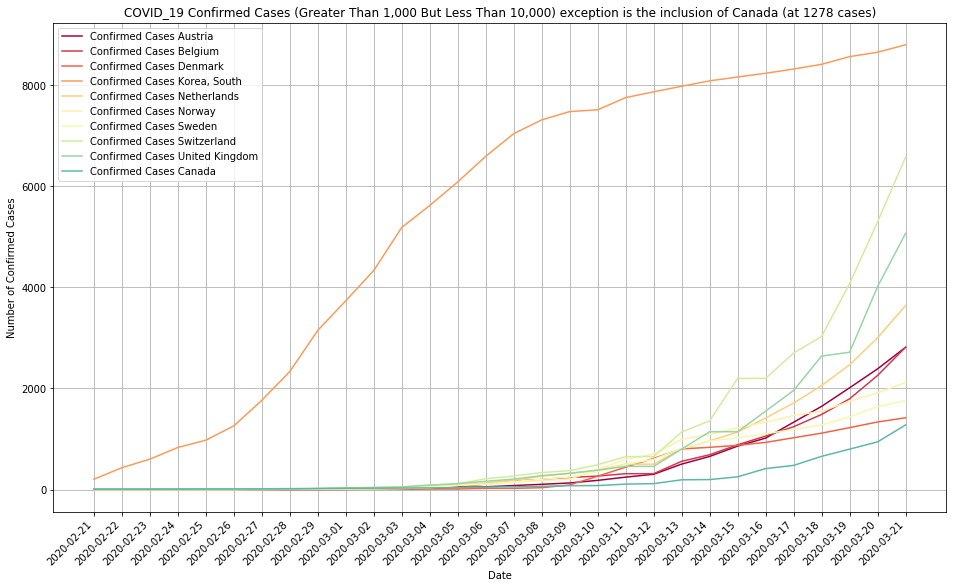

In [74]:
#Lets Plot the Countries who have less than 1000 cases but more than 100

plt.rcParams['figure.figsize'] = [16, 9]
#colors = [hsv_to_rgb([(i * 0.618033988749895) % 1.0, 1, 1])
#          for i in range(1000)]
#ax.rc('axes', prop_cycle=(cycler('color', colors)))
#ax.set_prop_cycle(color=cycler('color', colors))

start_date = 30

ax = plt.subplot(111)
ax.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,1,12)))

ax.plot(COVID_19_C_2.index[start_date:], COVID_19_C_2.Austria[start_date:], label='Confirmed Cases Austria')
ax.plot(COVID_19_C_2.index[start_date:], COVID_19_C_2.Belgium[start_date:], label='Confirmed Cases Belgium')
ax.plot(COVID_19_C_2.index[start_date:], COVID_19_C_2.Denmark[start_date:], label='Confirmed Cases Denmark')
ax.plot(COVID_19_C_2.index[start_date:], COVID_19_C_2['Korea, South'][start_date:], label='Confirmed Cases Korea, South')
ax.plot(COVID_19_C_2.index[start_date:], COVID_19_C_2.Netherlands[start_date:], label='Confirmed Cases Netherlands')
ax.plot(COVID_19_C_2.index[start_date:], COVID_19_C_2.Norway[start_date:], label='Confirmed Cases Norway')
ax.plot(COVID_19_C_2.index[start_date:], COVID_19_C_2.Sweden[start_date:], label='Confirmed Cases Sweden')
ax.plot(COVID_19_C_2.index[start_date:], COVID_19_C_2.Switzerland[start_date:], label='Confirmed Cases Switzerland')
ax.plot(COVID_19_C_2.index[start_date:], COVID_19_C_2['United Kingdom'][start_date:], label='Confirmed Cases United Kingdom')
ax.plot(COVID_19_C_2.index[start_date:], COVID_19_C_2.Canada[start_date:], label='Confirmed Cases Canada')

#ax.axis([1, 1, 1, COVID_19_C_2.Spain.iloc[-1]])

ax.set_xlabel('Date')
ax.set_ylabel('Number of Confirmed Cases')
plt.title('COVID_19 Confirmed Cases (Greater Than 1,000 But Less Than 10,000) exception is the inclusion of Canada (at 1278 cases)')
ax.legend(loc="upper left")
plt.xticks(rotation=45, ha='right')
ax.grid()
plt.show()

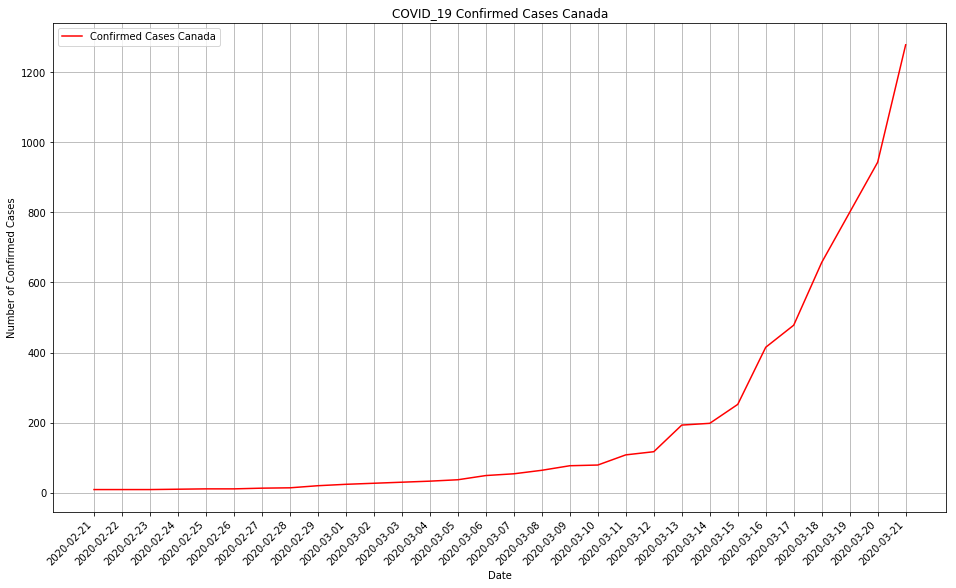

In [32]:
#Lets Plot the Countries who have less than 1000 cases but more than 100

plt.rcParams['figure.figsize'] = [16, 9]
#colors = [hsv_to_rgb([(i * 0.618033988749895) % 1.0, 1, 1])
#          for i in range(1000)]
#ax.rc('axes', prop_cycle=(cycler('color', colors)))
#ax.set_prop_cycle(color=cycler('color', colors))

start_date = 30

ax = plt.subplot(111)
ax.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,1,12)))

ax.plot(COVID_19_C_2.index[start_date:], COVID_19_C_2.Canada[start_date:], label='Confirmed Cases Canada', color = 'r')

#ax.axis([1, 1, 1, COVID_19_C_2.Spain.iloc[-1]])

ax.set_xlabel('Date')
ax.set_ylabel('Number of Confirmed Cases')
plt.title('COVID_19 Confirmed Cases Canada')
ax.legend(loc="upper left")
plt.xticks(rotation=45, ha='right')
ax.grid()
plt.show()

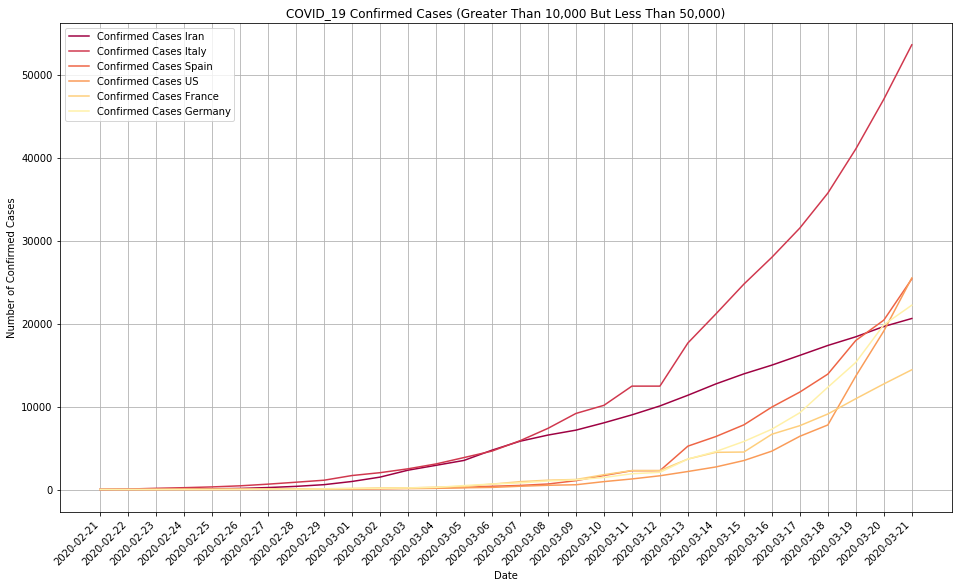

In [75]:
#Lets Plot the Countries who have less than 50,000 cases but more than 10,000

plt.rcParams['figure.figsize'] = [16, 9]
#colors = [hsv_to_rgb([(i * 0.618033988749895) % 1.0, 1, 1])
#          for i in range(1000)]
#ax.rc('axes', prop_cycle=(cycler('color', colors)))
#ax.set_prop_cycle(color=cycler('color', colors))

start_date = 30

ax = plt.subplot(111)
ax.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,1,12)))

ax.plot(COVID_19_C_2.index[start_date:], COVID_19_C_2.Iran[start_date:], label='Confirmed Cases Iran')
ax.plot(COVID_19_C_2.index[start_date:], COVID_19_C_2.Italy[start_date:], label='Confirmed Cases Italy')
ax.plot(COVID_19_C_2.index[start_date:], COVID_19_C_2.Spain[start_date:], label='Confirmed Cases Spain')
ax.plot(COVID_19_C_2.index[start_date:], COVID_19_C_2.US[start_date:], label='Confirmed Cases US')
ax.plot(COVID_19_C_2.index[start_date:], COVID_19_C_2.France[start_date:], label='Confirmed Cases France')
ax.plot(COVID_19_C_2.index[start_date:], COVID_19_C_2.Germany[start_date:], label='Confirmed Cases Germany')


#ax.axis([1, 1, 1, COVID_19_C_2.Spain.iloc[-1]])

ax.set_xlabel('Date')
ax.set_ylabel('Number of Confirmed Cases')
plt.title('COVID_19 Confirmed Cases (Greater Than 10,000 But Less Than 50,000)')
ax.legend(loc="upper left")
plt.xticks(rotation=45, ha='right')
ax.grid()
plt.show()

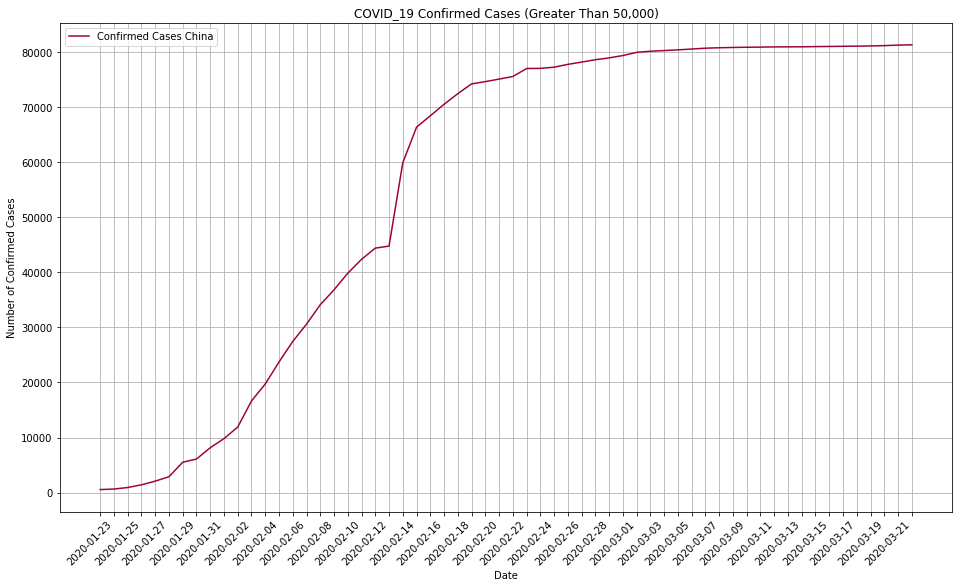

In [34]:
#Lets Plot the Countries who have greater than 50,000 cases

plt.rcParams['figure.figsize'] = [16, 9]
#colors = [hsv_to_rgb([(i * 0.618033988749895) % 1.0, 1, 1])
#          for i in range(1000)]
#ax.rc('axes', prop_cycle=(cycler('color', colors)))
#ax.set_prop_cycle(color=cycler('color', colors))

start_date = 30

ax = plt.subplot(111)
ax.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,1,12)))

ax.plot(COVID_19_C_2.index[:], COVID_19_C_2.China[:], label='Confirmed Cases China')

#ax.axis([1, 1, 1, COVID_19_C_2.Spain.iloc[-1]])

for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

ax.set_xlabel('Date')
ax.set_ylabel('Number of Confirmed Cases')
plt.title('COVID_19 Confirmed Cases (Greater Than 50,000)')
ax.legend(loc="upper left")
plt.xticks(rotation=45, ha='right')
ax.grid()
plt.show()

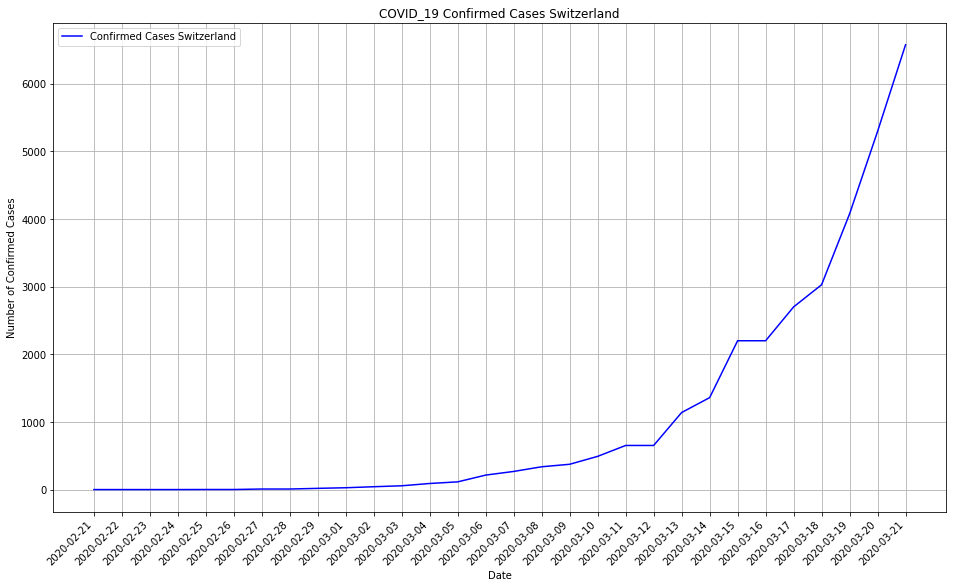

In [35]:
#Lets Plot Switzerland Cases

plt.rcParams['figure.figsize'] = [16, 9]
#colors = [hsv_to_rgb([(i * 0.618033988749895) % 1.0, 1, 1])
#          for i in range(1000)]
#ax.rc('axes', prop_cycle=(cycler('color', colors)))
#ax.set_prop_cycle(color=cycler('color', colors))

start_date = 30

ax = plt.subplot(111)
ax.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,1,12)))

ax.plot(COVID_19_C_2.index[start_date:], COVID_19_C_2.Switzerland[start_date:], label='Confirmed Cases Switzerland', color = 'b')

#ax.axis([1, 1, 1, COVID_19_C_2.Spain.iloc[-1]])

ax.set_xlabel('Date')
ax.set_ylabel('Number of Confirmed Cases')
plt.title('COVID_19 Confirmed Cases Switzerland')
ax.legend(loc="upper left")
plt.xticks(rotation=45, ha='right')
ax.grid()
plt.show()

#### Log Graphs

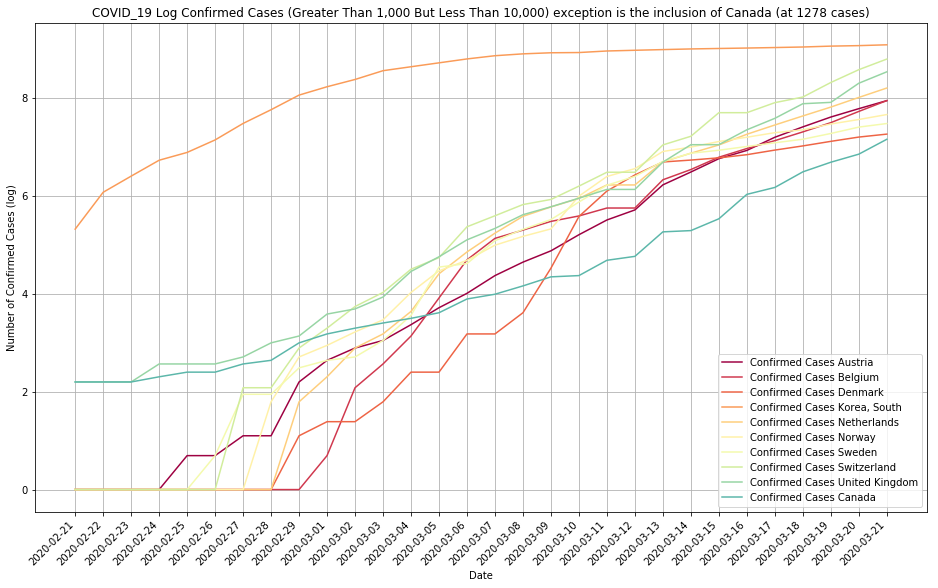

In [76]:
#Lets Plot the Countries who have less than 1000 cases but more than 100

plt.rcParams['figure.figsize'] = [16, 9]
#colors = [hsv_to_rgb([(i * 0.618033988749895) % 1.0, 1, 1])
#          for i in range(1000)]
#ax.rc('axes', prop_cycle=(cycler('color', colors)))
#ax.set_prop_cycle(color=cycler('color', colors))

start_date = 30

ax = plt.subplot(111)
ax.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,1,12)))

ax.plot(COVID_19_C_2_log.index[start_date:], COVID_19_C_2_log.Austria[start_date:], label='Confirmed Cases Austria')
ax.plot(COVID_19_C_2_log.index[start_date:], COVID_19_C_2_log.Belgium[start_date:], label='Confirmed Cases Belgium')
ax.plot(COVID_19_C_2_log.index[start_date:], COVID_19_C_2_log.Denmark[start_date:], label='Confirmed Cases Denmark')
ax.plot(COVID_19_C_2_log.index[start_date:], COVID_19_C_2_log['Korea, South'][start_date:], label='Confirmed Cases Korea, South')
ax.plot(COVID_19_C_2_log.index[start_date:], COVID_19_C_2_log.Netherlands[start_date:], label='Confirmed Cases Netherlands')
ax.plot(COVID_19_C_2_log.index[start_date:], COVID_19_C_2_log.Norway[start_date:], label='Confirmed Cases Norway')
ax.plot(COVID_19_C_2_log.index[start_date:], COVID_19_C_2_log.Sweden[start_date:], label='Confirmed Cases Sweden')
ax.plot(COVID_19_C_2_log.index[start_date:], COVID_19_C_2_log.Switzerland[start_date:], label='Confirmed Cases Switzerland')
ax.plot(COVID_19_C_2_log.index[start_date:], COVID_19_C_2_log['United Kingdom'][start_date:], label='Confirmed Cases United Kingdom')
ax.plot(COVID_19_C_2_log.index[start_date:], COVID_19_C_2_log.Canada[start_date:], label='Confirmed Cases Canada')

#ax.axis([1, 1, 1, COVID_19_C_2.Spain.iloc[-1]])

ax.set_xlabel('Date')
ax.set_ylabel('Number of Confirmed Cases (log)')
plt.title('COVID_19 Log Confirmed Cases (Greater Than 1,000 But Less Than 10,000) exception is the inclusion of Canada (at 1278 cases)')
ax.legend(loc="lower right")
plt.xticks(rotation=45, ha='right')
ax.grid()
plt.show()

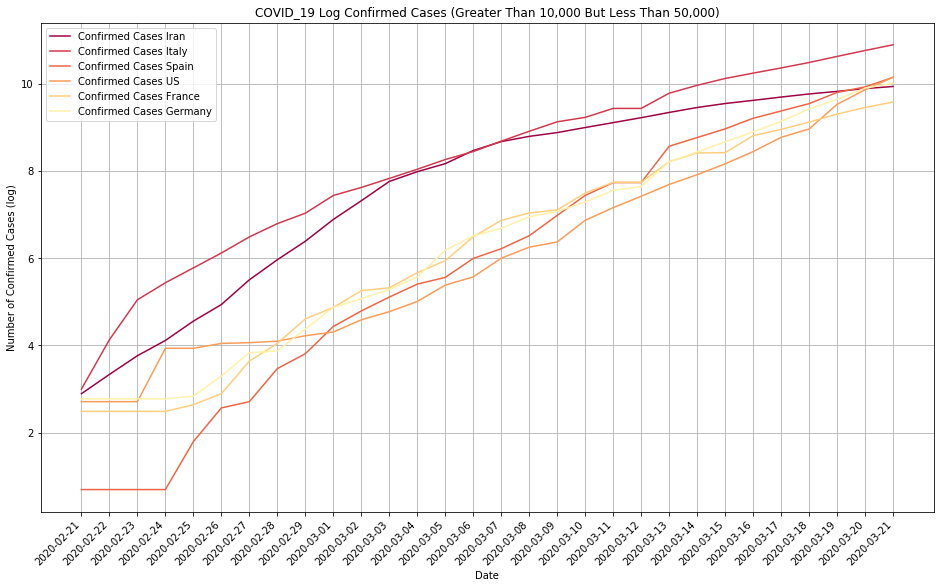

In [37]:
#Lets Plot the Countries who have less than 50,000 cases but more than 10,000

plt.rcParams['figure.figsize'] = [16, 9]
#colors = [hsv_to_rgb([(i * 0.618033988749895) % 1.0, 1, 1])
#          for i in range(1000)]
#ax.rc('axes', prop_cycle=(cycler('color', colors)))
#ax.set_prop_cycle(color=cycler('color', colors))

start_date = 30

ax = plt.subplot(111)
ax.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,1,12)))

ax.plot(COVID_19_C_2_log.index[start_date:], COVID_19_C_2_log.Iran[start_date:], label='Confirmed Cases Iran')
ax.plot(COVID_19_C_2_log.index[start_date:], COVID_19_C_2_log.Italy[start_date:], label='Confirmed Cases Italy')
ax.plot(COVID_19_C_2_log.index[start_date:], COVID_19_C_2_log.Spain[start_date:], label='Confirmed Cases Spain')
ax.plot(COVID_19_C_2_log.index[start_date:], COVID_19_C_2_log.US[start_date:], label='Confirmed Cases US')
ax.plot(COVID_19_C_2_log.index[start_date:], COVID_19_C_2_log.France[start_date:], label='Confirmed Cases France')
ax.plot(COVID_19_C_2_log.index[start_date:], COVID_19_C_2_log.Germany[start_date:], label='Confirmed Cases Germany')


#ax.axis([1, 1, 1, COVID_19_C_2.Spain.iloc[-1]])

ax.set_xlabel('Date')
ax.set_ylabel('Number of Confirmed Cases (log)')
plt.title('COVID_19 Log Confirmed Cases (Greater Than 10,000 But Less Than 50,000)')
ax.legend(loc="upper left")
plt.xticks(rotation=45, ha='right')
ax.grid()
plt.show()

#### Create dataframe that holds the differences between days

In [38]:
COVID_19_C_diff = COVID_19_C_2.copy()

for x in COVID_19_C_2.columns:
    COVID_19_C_diff[x] = COVID_19_C_2[x].diff()
    
COVID_19_C_diff = COVID_19_C_diff.iloc[1:]

COVID_19_C_diff = COVID_19_C_diff.reset_index()

In [39]:
COVID_19_C_diff.Canada.tail()

54     63
55    179
56    143
57    143
58    335
Name: Canada, dtype: object

In [40]:
COVID_19_D_diff = COVID_19_D_2.copy()

for x in COVID_19_D_2.columns:
    COVID_19_D_diff[x] = COVID_19_D_2[x].diff()
    
COVID_19_D_diff = COVID_19_D_diff.iloc[1:]

COVID_19_D_diff = COVID_19_D_diff.reset_index()

In [41]:
COVID_19_D_diff.Canada.tail()

54    1
55    3
56    1
57    3
58    7
Name: Canada, dtype: object

In [42]:
COVID_19_R_diff = COVID_19_R_2.copy()

for x in COVID_19_R_2.columns:
    COVID_19_R_diff[x] = COVID_19_R_2[x].diff()
    
COVID_19_R_diff = COVID_19_R_diff.iloc[1:]

COVID_19_R_diff = COVID_19_R_diff.reset_index()

In [43]:
COVID_19_R_diff.Canada.tail()

54    0
55    0
56    0
57    0
58    1
Name: Canada, dtype: object

In [44]:
start_date = 25

Text(0.5, 1.0, 'COVID_19 Confirmed Cases per Day for South Korea')

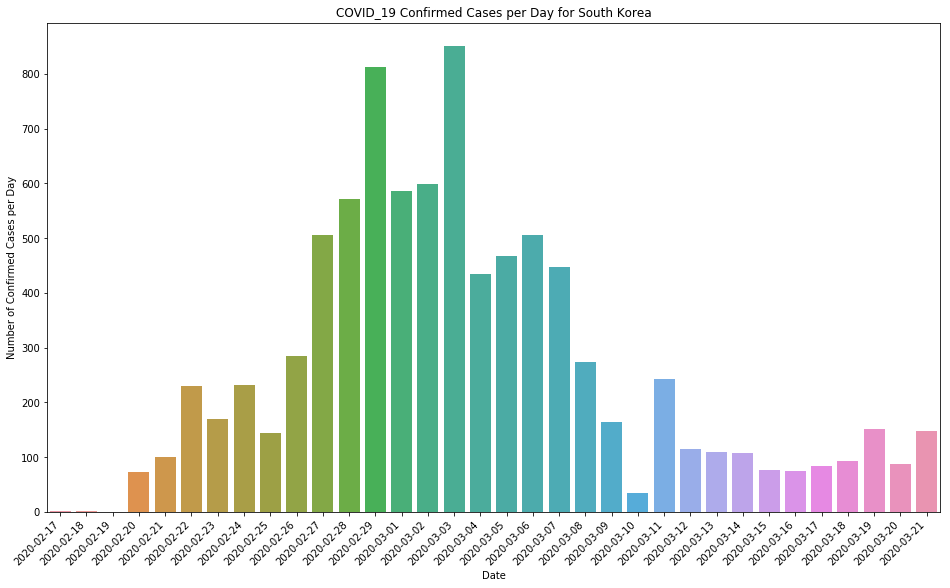

In [45]:
ax = sns.barplot(x=(COVID_19_C_diff['index'][start_date:]), y=COVID_19_C_diff['Korea, South'][start_date:], data=COVID_19_C_diff)
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Confirmed Cases per Day')
plt.title('COVID_19 Confirmed Cases per Day for South Korea')

In [46]:
print (COVID_19_C_diff['Korea, South'].mean(axis = 0))
print (COVID_19_C_diff['Korea, South'].std(axis = 0))

149.11864406779662
217.65641104064744


In [47]:
print (COVID_19_C_diff['China'].mean(axis = 0))
print (COVID_19_C_diff['China'].std(axis = 0))

1368.7627118644068
2316.297784284692


Text(0.5, 1.0, 'COVID_19 Confirmed Cases per Day for China')

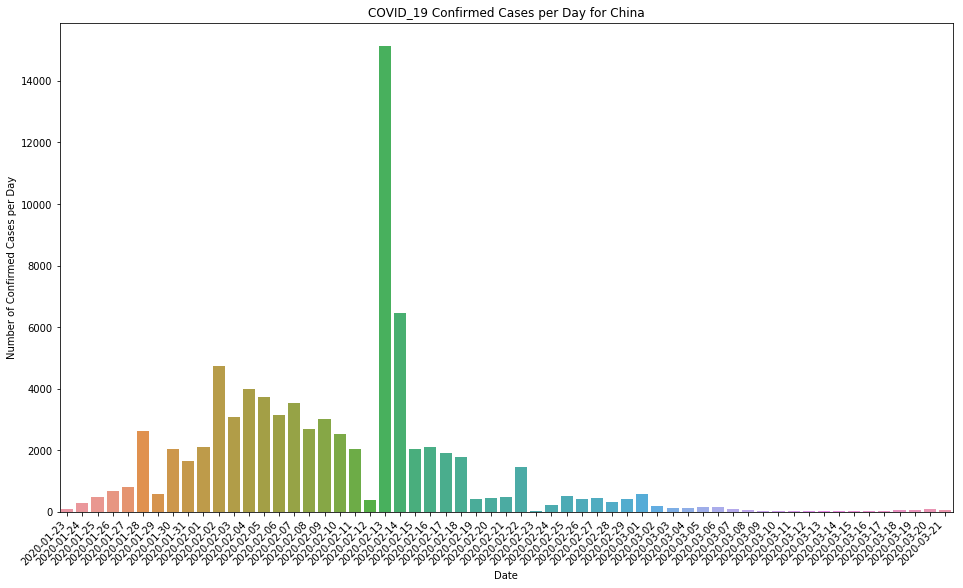

In [48]:
ax = sns.barplot(x=(COVID_19_C_diff['index']), y=COVID_19_C_diff['China'], data=COVID_19_C_diff)
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Confirmed Cases per Day')
plt.title('COVID_19 Confirmed Cases per Day for China')

In [49]:
start_date = 35

Text(0.5, 1.0, 'COVID_19 Confirmed Cases per Day for Canada')

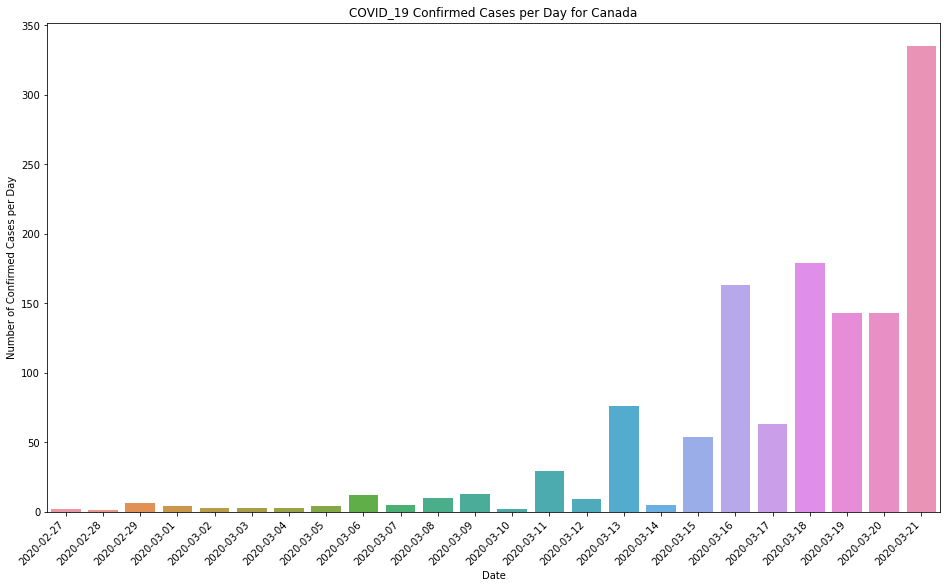

In [50]:
ax = sns.barplot(x=(COVID_19_C_diff['index'][start_date:]), y=COVID_19_C_diff['Canada'][start_date:], data=COVID_19_C_diff)
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Confirmed Cases per Day')
plt.title('COVID_19 Confirmed Cases per Day for Canada')

Text(0.5, 1.0, 'COVID_19 Deaths per Day for US')

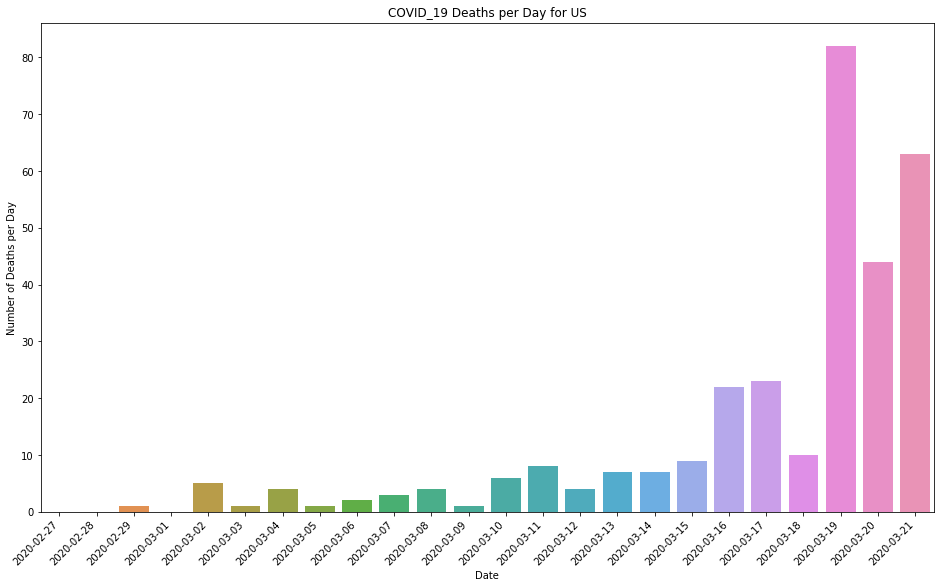

In [51]:
ax = sns.barplot(x=(COVID_19_D_diff['index'][start_date:]), y=COVID_19_D_diff['US'][start_date:], data=COVID_19_D_diff)
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Deaths per Day')
plt.title('COVID_19 Deaths per Day for US')

Text(0.5, 1.0, 'COVID_19 Confirmed Cases per Day for US')

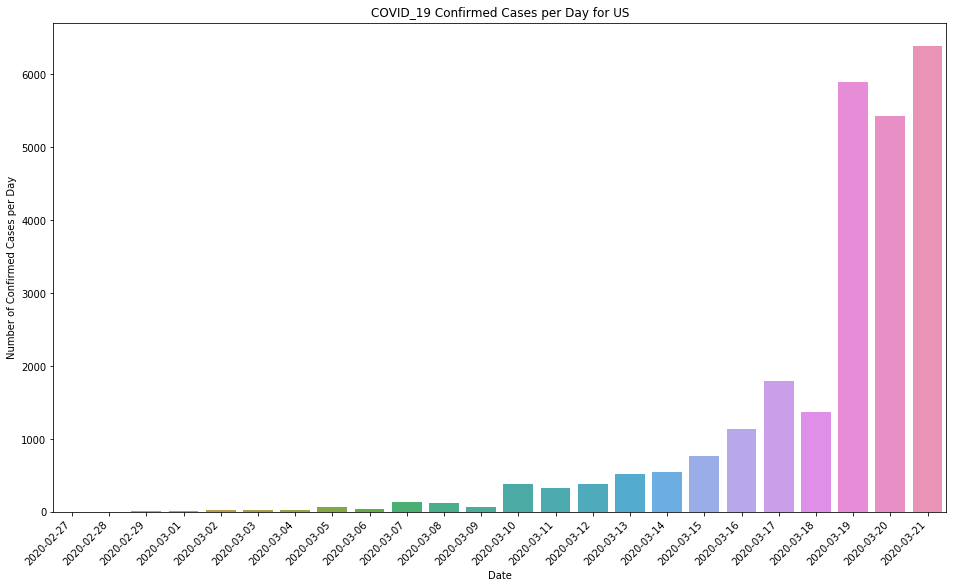

In [52]:
ax = sns.barplot(x=(COVID_19_C_diff['index'][start_date:]), y=COVID_19_C_diff['US'][start_date:], data=COVID_19_C_diff)
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Confirmed Cases per Day')
plt.title('COVID_19 Confirmed Cases per Day for US')

Text(0.5, 1.0, 'COVID_19 Confirmed Cases per Day for Spain')

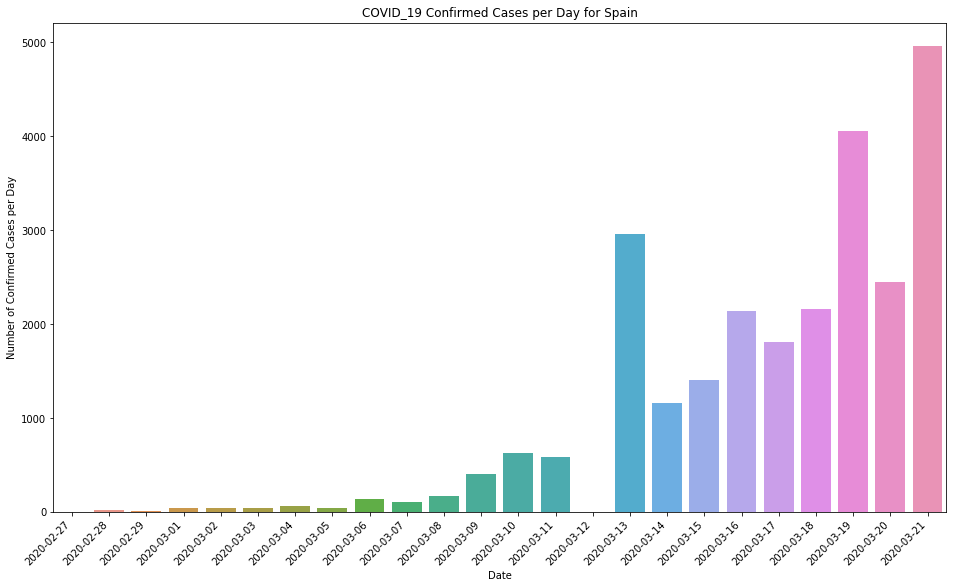

In [53]:
ax = sns.barplot(x=(COVID_19_C_diff['index'][start_date:]), y=COVID_19_C_diff.Spain[start_date:], data=COVID_19_C_diff)
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Confirmed Cases per Day')
plt.title('COVID_19 Confirmed Cases per Day for Spain')

Text(0.5, 1.0, 'COVID_19 Confirmed Cases per Day for Italy')

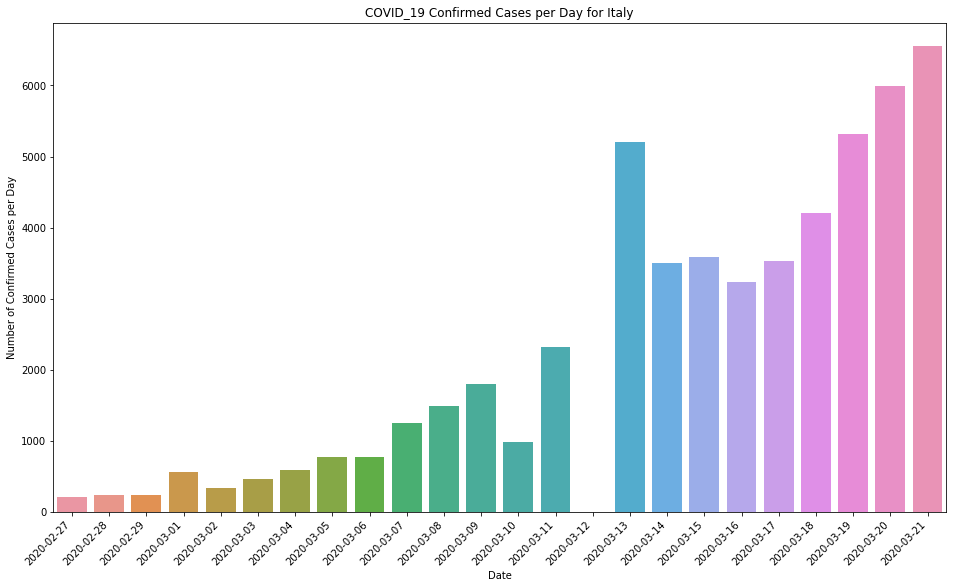

In [54]:
ax = sns.barplot(x=(COVID_19_C_diff['index'][start_date:]), y=COVID_19_C_diff.Italy[start_date:], data=COVID_19_C_diff)
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Confirmed Cases per Day')
plt.title('COVID_19 Confirmed Cases per Day for Italy')

In [55]:
COVID_19_C_2.US.diff()

2020-01-22     NaN
2020-01-23       0
2020-01-24       1
2020-01-25       0
2020-01-26       3
2020-01-27       0
2020-01-28       0
2020-01-29       0
2020-01-30       0
2020-01-31       2
2020-02-01       1
2020-02-02       0
2020-02-03       3
2020-02-04       0
2020-02-05       0
2020-02-06       0
2020-02-07       0
2020-02-08       0
2020-02-09       0
2020-02-10       0
2020-02-11       1
2020-02-12       0
2020-02-13       1
2020-02-14       0
2020-02-15       0
2020-02-16       0
2020-02-17       0
2020-02-18       0
2020-02-19       0
2020-02-20       0
2020-02-21       2
2020-02-22       0
2020-02-23       0
2020-02-24      36
2020-02-25       0
2020-02-26       6
2020-02-27       1
2020-02-28       2
2020-02-29       8
2020-03-01       6
2020-03-02      24
2020-03-03      20
2020-03-04      31
2020-03-05      68
2020-03-06      45
2020-03-07     140
2020-03-08     116
2020-03-09      65
2020-03-10     376
2020-03-11     322
2020-03-12     382
2020-03-13     516
2020-03-14  

Correlation between Confirmed Cases and Deaths

In [56]:
COVID_19_Corr = COVID_19_C_diff[['US']].copy()
COVID_19_Corr = COVID_19_Corr.rename(columns={"US": "Confirmed US"})
COVID_19_Corr['Deaths US'] = COVID_19_D_diff[['US']]
COVID_19_Corr['Confirmed Canada'] = COVID_19_C_diff[['Canada']]
COVID_19_Corr['Deaths Canada'] = COVID_19_D_diff[['Canada']]
COVID_19_Corr = COVID_19_Corr.astype(float)
COVID_19_Corr.tail()
COVID_19_Corr.corr()

,Confirmed US,Deaths US,Confirmed Canada,Deaths Canada
0,,,,
Confirmed US,1.000000,0.968501,0.856393,0.789276
Deaths US,0.968501,1.000000,0.818480,0.708003
Confirmed Canada,0.856393,0.818480,1.000000,0.949123
Deaths Canada,0.789276,0.708003,0.949123,1.000000


In [57]:
COVID_19_Corr = COVID_19_C_diff[['Iran']].copy()
COVID_19_Corr = COVID_19_Corr.rename(columns={"Iran": "Confirmed Iran"})
COVID_19_Corr['Confirmed Italy'] = COVID_19_C_diff[['Italy']]
COVID_19_Corr['Confirmed Spain'] = COVID_19_C_diff[['Spain']]
COVID_19_Corr['Confirmed US'] = COVID_19_C_diff[['US']]
COVID_19_Corr['Confirmed France'] = COVID_19_C_diff[['France']]
COVID_19_Corr['Confirmed Germany'] = COVID_19_C_diff[['Germany']]
COVID_19_Corr = COVID_19_Corr.astype(float)
COVID_19_Corr.tail()
COVID_19_Corr.corr()

,Confirmed Iran,Confirmed Italy,Confirmed Spain,Confirmed US,Confirmed France,Confirmed Germany
0,,,,,,
Confirmed Iran,1.000000,0.802821,0.661066,0.507581,0.712685,0.680816
Confirmed Italy,0.802821,1.000000,0.944834,0.823179,0.903620,0.913309
Confirmed Spain,0.661066,0.944834,1.000000,0.886164,0.910676,0.864829
Confirmed US,0.507581,0.823179,0.886164,1.000000,0.793911,0.858425
Confirmed France,0.712685,0.903620,0.910676,0.793911,1.000000,0.889004
Confirmed Germany,0.680816,0.913309,0.864829,0.858425,0.889004,1.000000


### Time to Double Canada

In [58]:
for x in range (len(COVID_19_C_2)):
    if COVID_19_C_2.Canada[x] > 100:
        print (x)
        print (COVID_19_C_2.index[x])

49
2020-03-11
50
2020-03-12
51
2020-03-13
52
2020-03-14
53
2020-03-15
54
2020-03-16
55
2020-03-17
56
2020-03-18
57
2020-03-19
58
2020-03-20
59
2020-03-21


In [59]:
COVID_19_C_2_Canada_to_Double = COVID_19_C_2.Canada[49:]

COVID_19_C_2_Canada_to_Double = COVID_19_C_2_Canada_to_Double.astype(float)

COVID_19_C_2_Canada_to_Double = COVID_19_C_2_Canada_to_Double.reset_index()

COVID_19_C_2_Canada_to_Double = COVID_19_C_2_Canada_to_Double.reset_index()

COVID_19_C_2_Canada_to_Double.head()

,level_0,index,Canada
0,0,2020-03-11,108.0
1,1,2020-03-12,117.0
2,2,2020-03-13,193.0
3,3,2020-03-14,198.0
4,4,2020-03-15,252.0


In [60]:
COVID_19_C_2_Canada_to_Double['Time to Double Line @ 2 Days'] = 0
COVID_19_C_2_Canada_to_Double['Time to Double Line @ 3 Days'] = 0
COVID_19_C_2_Canada_to_Double['Time to Double Line @ 5 Days'] = 0

for x in range (len(COVID_19_C_2_Canada_to_Double)):
    if x == 0:
        COVID_19_C_2_Canada_to_Double['Time to Double Line @ 2 Days'][x] = COVID_19_C_2_Canada_to_Double.Canada[x]
        COVID_19_C_2_Canada_to_Double['Time to Double Line @ 3 Days'][x] = COVID_19_C_2_Canada_to_Double.Canada[x]
        COVID_19_C_2_Canada_to_Double['Time to Double Line @ 5 Days'][x] = COVID_19_C_2_Canada_to_Double.Canada[x]
    else:
        COVID_19_C_2_Canada_to_Double['Time to Double Line @ 2 Days'][x] = COVID_19_C_2_Canada_to_Double['Time to Double Line @ 2 Days'][x-1]*1.41421
        COVID_19_C_2_Canada_to_Double['Time to Double Line @ 3 Days'][x] = COVID_19_C_2_Canada_to_Double['Time to Double Line @ 3 Days'][x-1]*1.2599
        COVID_19_C_2_Canada_to_Double['Time to Double Line @ 5 Days'][x] = COVID_19_C_2_Canada_to_Double['Time to Double Line @ 5 Days'][x-1]*1.14869

COVID_19_C_2_Canada_to_Double = COVID_19_C_2_Canada_to_Double.set_index('index')

C:\Users\BryanT\AppData\Local\conda\conda\envs\py35\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\BryanT\AppData\Local\conda\conda\envs\py35\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\BryanT\AppData\Local\conda\conda\envs\py35\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __na

In [61]:
COVID_19_C_2_Canada_to_Double.head()

,level_0,Canada,Time to Double Line @ 2 Days,Time to Double Line @ 3 Days,Time to Double Line @ 5 Days
index,,,,,
2020-03-11,0,108.0,108,108,108
2020-03-12,1,117.0,152,136,124
2020-03-13,2,193.0,214,171,142
2020-03-14,3,198.0,302,215,163
2020-03-15,4,252.0,427,270,187


In [62]:
COVID_19_C_2_Canada_to_Double.Canada = np.log(COVID_19_C_2_Canada_to_Double.Canada)
COVID_19_C_2_Canada_to_Double['Time to Double Line @ 2 Days'] = np.log(COVID_19_C_2_Canada_to_Double['Time to Double Line @ 2 Days'])
COVID_19_C_2_Canada_to_Double['Time to Double Line @ 3 Days'] = np.log(COVID_19_C_2_Canada_to_Double['Time to Double Line @ 3 Days'])
COVID_19_C_2_Canada_to_Double['Time to Double Line @ 5 Days'] = np.log(COVID_19_C_2_Canada_to_Double['Time to Double Line @ 5 Days'])

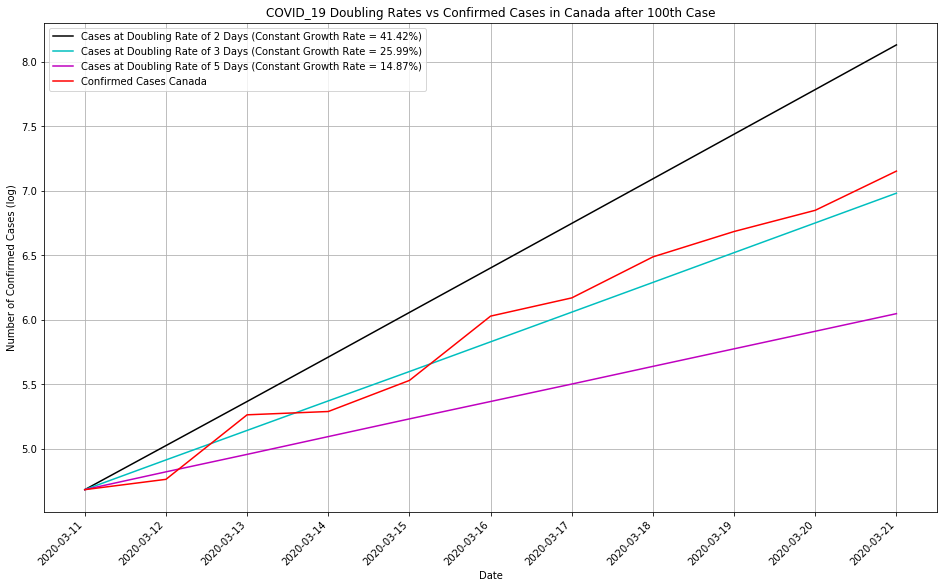

In [63]:
#Lets Plot the Countries who have less than 50,000 cases but more than 10,000

plt.rcParams['figure.figsize'] = [16, 9]
#colors = [hsv_to_rgb([(i * 0.618033988749895) % 1.0, 1, 1])
#          for i in range(1000)]
#ax.rc('axes', prop_cycle=(cycler('color', colors)))
#ax.set_prop_cycle(color=cycler('color', colors))

start_date = 30

ax = plt.subplot(111)
ax.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,1,12)))

ax.plot(COVID_19_C_2_Canada_to_Double.index, COVID_19_C_2_Canada_to_Double['Time to Double Line @ 2 Days'], label='Cases at Doubling Rate of 2 Days (Constant Growth Rate = 41.42%)', color = 'k')
ax.plot(COVID_19_C_2_Canada_to_Double.index, COVID_19_C_2_Canada_to_Double['Time to Double Line @ 3 Days'], label='Cases at Doubling Rate of 3 Days (Constant Growth Rate = 25.99%)', color = 'c')
ax.plot(COVID_19_C_2_Canada_to_Double.index, COVID_19_C_2_Canada_to_Double['Time to Double Line @ 5 Days'], label='Cases at Doubling Rate of 5 Days (Constant Growth Rate = 14.87%)', color = 'm')
ax.plot(COVID_19_C_2_Canada_to_Double.index, COVID_19_C_2_Canada_to_Double.Canada, label='Confirmed Cases Canada', color = 'r')



#ax.axis([1, 1, 1, COVID_19_C_2.Spain.iloc[-1]])

ax.set_xlabel('Date')
ax.set_ylabel('Number of Confirmed Cases (log)')
plt.title('COVID_19 Doubling Rates vs Confirmed Cases in Canada after 100th Case')
ax.legend(loc="upper left")
plt.xticks(rotation=45, ha='right')
ax.grid()
plt.show()

### Time to Double US

In [64]:
for x in range (len(COVID_19_C_2)):
    if COVID_19_C_2.US[x] > 100:
        print (x)
        print (COVID_19_C_2.index[x])

41
2020-03-03
42
2020-03-04
43
2020-03-05
44
2020-03-06
45
2020-03-07
46
2020-03-08
47
2020-03-09
48
2020-03-10
49
2020-03-11
50
2020-03-12
51
2020-03-13
52
2020-03-14
53
2020-03-15
54
2020-03-16
55
2020-03-17
56
2020-03-18
57
2020-03-19
58
2020-03-20
59
2020-03-21


In [65]:
COVID_19_C_2_US_to_Double = COVID_19_C_2.US[41:]

COVID_19_C_2_US_to_Double = COVID_19_C_2_US_to_Double.astype(float)

COVID_19_C_2_US_to_Double = COVID_19_C_2_US_to_Double.reset_index()

COVID_19_C_2_US_to_Double = COVID_19_C_2_US_to_Double.reset_index()

COVID_19_C_2_US_to_Double.head()

,level_0,index,US
0,0,2020-03-03,118.0
1,1,2020-03-04,149.0
2,2,2020-03-05,217.0
3,3,2020-03-06,262.0
4,4,2020-03-07,402.0


In [66]:
COVID_19_C_2_US_to_Double['Time to Double Line @ 2 Days'] = 0
COVID_19_C_2_US_to_Double['Time to Double Line @ 3 Days'] = 0
COVID_19_C_2_US_to_Double['Time to Double Line @ 5 Days'] = 0

for x in range (len(COVID_19_C_2_US_to_Double)):
    if x == 0:
        COVID_19_C_2_US_to_Double['Time to Double Line @ 2 Days'][x] = COVID_19_C_2_US_to_Double.US[x]
        COVID_19_C_2_US_to_Double['Time to Double Line @ 3 Days'][x] = COVID_19_C_2_US_to_Double.US[x]
        COVID_19_C_2_US_to_Double['Time to Double Line @ 5 Days'][x] = COVID_19_C_2_US_to_Double.US[x]
    else:
        COVID_19_C_2_US_to_Double['Time to Double Line @ 2 Days'][x] = COVID_19_C_2_US_to_Double['Time to Double Line @ 2 Days'][x-1]*1.41421
        COVID_19_C_2_US_to_Double['Time to Double Line @ 3 Days'][x] = COVID_19_C_2_US_to_Double['Time to Double Line @ 3 Days'][x-1]*1.2599
        COVID_19_C_2_US_to_Double['Time to Double Line @ 5 Days'][x] = COVID_19_C_2_US_to_Double['Time to Double Line @ 5 Days'][x-1]*1.14869

COVID_19_C_2_US_to_Double = COVID_19_C_2_US_to_Double.set_index('index')

C:\Users\BryanT\AppData\Local\conda\conda\envs\py35\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\BryanT\AppData\Local\conda\conda\envs\py35\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\BryanT\AppData\Local\conda\conda\envs\py35\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __na

In [67]:
COVID_19_C_2_US_to_Double.US = np.log(COVID_19_C_2_US_to_Double.US)
COVID_19_C_2_US_to_Double['Time to Double Line @ 2 Days'] = np.log(COVID_19_C_2_US_to_Double['Time to Double Line @ 2 Days'])
COVID_19_C_2_US_to_Double['Time to Double Line @ 3 Days'] = np.log(COVID_19_C_2_US_to_Double['Time to Double Line @ 3 Days'])
COVID_19_C_2_US_to_Double['Time to Double Line @ 5 Days'] = np.log(COVID_19_C_2_US_to_Double['Time to Double Line @ 5 Days'])

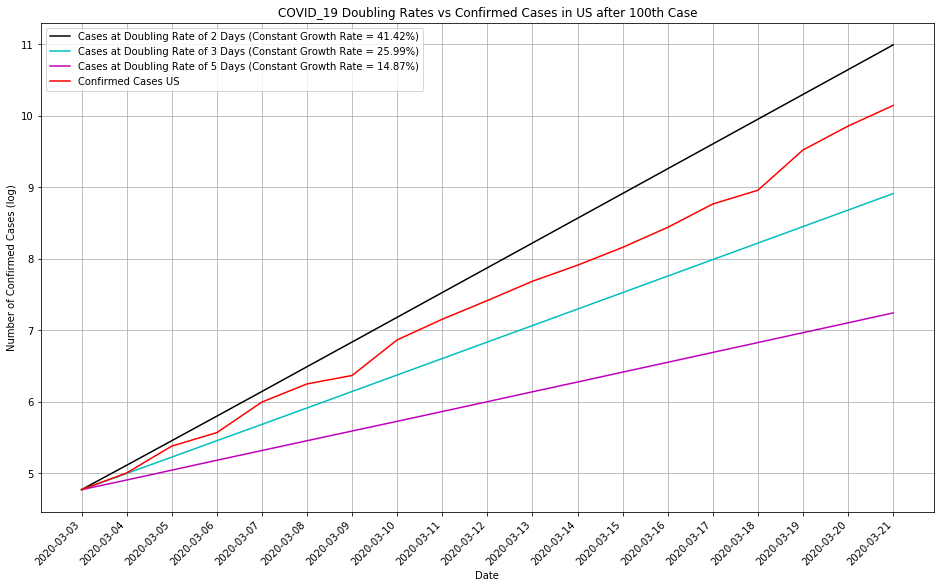

In [68]:
#Lets Plot the Countries who have less than 50,000 cases but more than 10,000

plt.rcParams['figure.figsize'] = [16, 9]
#colors = [hsv_to_rgb([(i * 0.618033988749895) % 1.0, 1, 1])
#          for i in range(1000)]
#ax.rc('axes', prop_cycle=(cycler('color', colors)))
#ax.set_prop_cycle(color=cycler('color', colors))

start_date = 30

ax = plt.subplot(111)
ax.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,1,12)))

ax.plot(COVID_19_C_2_US_to_Double.index, COVID_19_C_2_US_to_Double['Time to Double Line @ 2 Days'], label='Cases at Doubling Rate of 2 Days (Constant Growth Rate = 41.42%)', color = 'k')
ax.plot(COVID_19_C_2_US_to_Double.index, COVID_19_C_2_US_to_Double['Time to Double Line @ 3 Days'], label='Cases at Doubling Rate of 3 Days (Constant Growth Rate = 25.99%)', color = 'c')
ax.plot(COVID_19_C_2_US_to_Double.index, COVID_19_C_2_US_to_Double['Time to Double Line @ 5 Days'], label='Cases at Doubling Rate of 5 Days (Constant Growth Rate = 14.87%)', color = 'm')
ax.plot(COVID_19_C_2_US_to_Double.index, COVID_19_C_2_US_to_Double.US, label='Confirmed Cases US', color = 'r')



#ax.axis([1, 1, 1, COVID_19_C_2.Spain.iloc[-1]])

ax.set_xlabel('Date')
ax.set_ylabel('Number of Confirmed Cases (log)')
plt.title('COVID_19 Doubling Rates vs Confirmed Cases in US after 100th Case')
ax.legend(loc="upper left")
plt.xticks(rotation=45, ha='right')
ax.grid()
plt.show()

### Time to Double South Korea

In [69]:
for x in range (len(COVID_19_C_2)):
    if COVID_19_C_2['Korea, South'][x] > 100:
        print (x)
        print (COVID_19_C_2.index[x])

29
2020-02-20
30
2020-02-21
31
2020-02-22
32
2020-02-23
33
2020-02-24
34
2020-02-25
35
2020-02-26
36
2020-02-27
37
2020-02-28
38
2020-02-29
39
2020-03-01
40
2020-03-02
41
2020-03-03
42
2020-03-04
43
2020-03-05
44
2020-03-06
45
2020-03-07
46
2020-03-08
47
2020-03-09
48
2020-03-10
49
2020-03-11
50
2020-03-12
51
2020-03-13
52
2020-03-14
53
2020-03-15
54
2020-03-16
55
2020-03-17
56
2020-03-18
57
2020-03-19
58
2020-03-20
59
2020-03-21


In [70]:
COVID_19_C_2_South_Korea_to_Double = COVID_19_C_2['Korea, South'][29:]

COVID_19_C_2_South_Korea_to_Double = COVID_19_C_2_South_Korea_to_Double.astype(float)

COVID_19_C_2_South_Korea_to_Double = COVID_19_C_2_South_Korea_to_Double.reset_index()

COVID_19_C_2_South_Korea_to_Double = COVID_19_C_2_South_Korea_to_Double.reset_index()

COVID_19_C_2_South_Korea_to_Double.head()

,level_0,index,"Korea, South"
0,0,2020-02-20,104.0
1,1,2020-02-21,204.0
2,2,2020-02-22,433.0
3,3,2020-02-23,602.0
4,4,2020-02-24,833.0


In [71]:
COVID_19_C_2_South_Korea_to_Double['Time to Double Line @ 2 Days'] = 0
COVID_19_C_2_South_Korea_to_Double['Time to Double Line @ 3 Days'] = 0
COVID_19_C_2_South_Korea_to_Double['Time to Double Line @ 5 Days'] = 0

for x in range (len(COVID_19_C_2_South_Korea_to_Double)):
    if x == 0:
        COVID_19_C_2_South_Korea_to_Double['Time to Double Line @ 2 Days'][x] = COVID_19_C_2_South_Korea_to_Double['Korea, South'][x]
        COVID_19_C_2_South_Korea_to_Double['Time to Double Line @ 3 Days'][x] = COVID_19_C_2_South_Korea_to_Double['Korea, South'][x]
        COVID_19_C_2_South_Korea_to_Double['Time to Double Line @ 5 Days'][x] = COVID_19_C_2_South_Korea_to_Double['Korea, South'][x]
    else:
        COVID_19_C_2_South_Korea_to_Double['Time to Double Line @ 2 Days'][x] = COVID_19_C_2_South_Korea_to_Double['Time to Double Line @ 2 Days'][x-1]*1.41421
        COVID_19_C_2_South_Korea_to_Double['Time to Double Line @ 3 Days'][x] = COVID_19_C_2_South_Korea_to_Double['Time to Double Line @ 3 Days'][x-1]*1.2599
        COVID_19_C_2_South_Korea_to_Double['Time to Double Line @ 5 Days'][x] = COVID_19_C_2_South_Korea_to_Double['Time to Double Line @ 5 Days'][x-1]*1.14869

COVID_19_C_2_South_Korea_to_Double = COVID_19_C_2_South_Korea_to_Double.set_index('index')

C:\Users\BryanT\AppData\Local\conda\conda\envs\py35\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\BryanT\AppData\Local\conda\conda\envs\py35\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\BryanT\AppData\Local\conda\conda\envs\py35\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __na

In [72]:
COVID_19_C_2_South_Korea_to_Double['Korea, South'] = np.log(COVID_19_C_2_South_Korea_to_Double['Korea, South'])
COVID_19_C_2_South_Korea_to_Double['Time to Double Line @ 2 Days'] = np.log(COVID_19_C_2_South_Korea_to_Double['Time to Double Line @ 2 Days'])
COVID_19_C_2_South_Korea_to_Double['Time to Double Line @ 3 Days'] = np.log(COVID_19_C_2_South_Korea_to_Double['Time to Double Line @ 3 Days'])
COVID_19_C_2_South_Korea_to_Double['Time to Double Line @ 5 Days'] = np.log(COVID_19_C_2_South_Korea_to_Double['Time to Double Line @ 5 Days'])

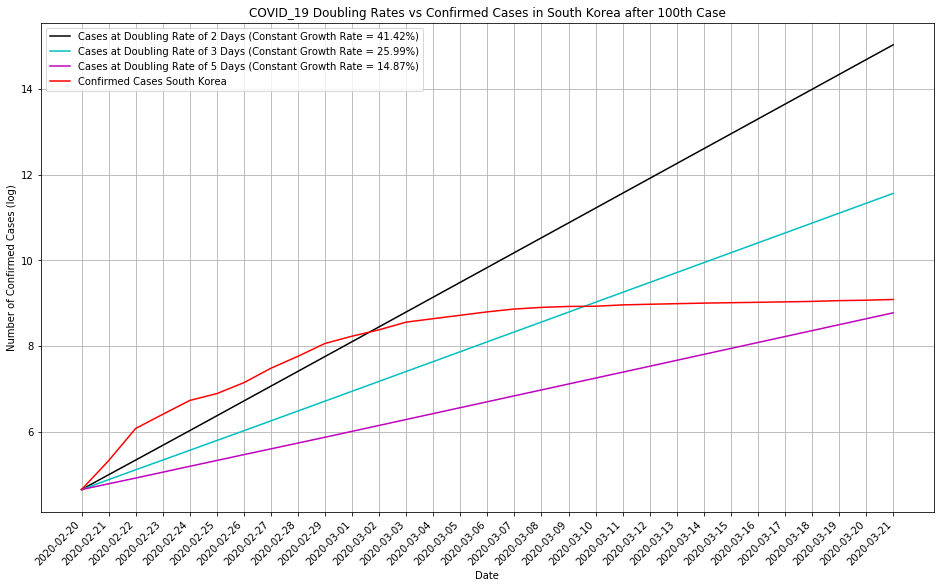

In [73]:
#Lets Plot the Countries who have less than 50,000 cases but more than 10,000

plt.rcParams['figure.figsize'] = [16, 9]
#colors = [hsv_to_rgb([(i * 0.618033988749895) % 1.0, 1, 1])
#          for i in range(1000)]
#ax.rc('axes', prop_cycle=(cycler('color', colors)))
#ax.set_prop_cycle(color=cycler('color', colors))

start_date = 30

ax = plt.subplot(111)
ax.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,1,12)))

ax.plot(COVID_19_C_2_South_Korea_to_Double.index, COVID_19_C_2_South_Korea_to_Double['Time to Double Line @ 2 Days'], label='Cases at Doubling Rate of 2 Days (Constant Growth Rate = 41.42%)', color = 'k')
ax.plot(COVID_19_C_2_South_Korea_to_Double.index, COVID_19_C_2_South_Korea_to_Double['Time to Double Line @ 3 Days'], label='Cases at Doubling Rate of 3 Days (Constant Growth Rate = 25.99%)', color = 'c')
ax.plot(COVID_19_C_2_South_Korea_to_Double.index, COVID_19_C_2_South_Korea_to_Double['Time to Double Line @ 5 Days'], label='Cases at Doubling Rate of 5 Days (Constant Growth Rate = 14.87%)', color = 'm')
ax.plot(COVID_19_C_2_South_Korea_to_Double.index, COVID_19_C_2_South_Korea_to_Double['Korea, South'], label='Confirmed Cases South Korea', color = 'r')



#ax.axis([1, 1, 1, COVID_19_C_2.Spain.iloc[-1]])

ax.set_xlabel('Date')
ax.set_ylabel('Number of Confirmed Cases (log)')
plt.title('COVID_19 Doubling Rates vs Confirmed Cases in South Korea after 100th Case')
ax.legend(loc="upper left")
plt.xticks(rotation=45, ha='right')
ax.grid()
plt.show()

### Correlation Matricies With Stocks

In [65]:
Correlation_COVID_19_C_3 = pd.concat([COVID_19_C_2,dfP], axis=1)
Correlation_COVID_19_D_3 = pd.concat([COVID_19_D_2,dfP], axis=1)
Correlation_COVID_19_R_3 = pd.concat([COVID_19_R_2,dfP], axis=1)

In [170]:
Correlation_COVID_19_C_3 = Correlation_COVID_19_C_3.astype(float)

Correlation_COVID_19_D_3 = Correlation_COVID_19_D_3.astype(float)

Correlation_COVID_19_R_3 = Correlation_COVID_19_R_3.astype(float)

In [171]:
corelation_matrix_C = Correlation_COVID_19_C_3.corr()
corelation_matrix_D = Correlation_COVID_19_D_3.corr()
corelation_matrix_R = Correlation_COVID_19_R_3.corr()

In [172]:
corelation_matrix_C.to_csv ('correlation_matrix_confirmed_cases.csv', index = False, header=True)
corelation_matrix_D.to_csv ('correlation_matrix_death_cases.csv', index = False, header=True)
corelation_matrix_R.to_csv ('correlation_matrix_recovery_cases.csv', index = False, header=True)

In [174]:
COVID_19_C_2.to_csv ('total_cumulative_confirmed.csv', index = False, header=True)
COVID_19_D_2.to_csv ('total_cumulative_death.csv', index = False, header=True)
COVID_19_R_2.to_csv ('total_cumulative_recovered.csv', index = False, header=True)

Lets play around with top 10 values in different dataframes

In [175]:
corelation_matrix_C.head()

,Afghanistan,Albania,Algeria,Andorra,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,...,XRT,RXI,IYW,VIS,KBE,SIL,FNCL,XAR,FXU,SHY
Afghanistan,1.000000,0.946215,0.941665,0.776781,0.774217,0.977925,0.902163,0.774217,0.979945,0.979598,...,-0.859079,-0.858527,-0.815398,-0.833971,-0.799697,-0.801400,-0.814156,-0.835310,-0.847763,0.664545
Albania,0.946215,1.000000,0.892652,0.694536,0.883986,0.975561,0.852497,0.883986,0.957743,0.982590,...,-0.831988,-0.817833,-0.747880,-0.786413,-0.736322,-0.863698,-0.754434,-0.790848,-0.838270,0.572895
Algeria,0.941665,0.892652,1.000000,0.901810,0.723357,0.942775,0.791659,0.723357,0.969541,0.930873,...,-0.920051,-0.913570,-0.868526,-0.903954,-0.898034,-0.848112,-0.901067,-0.904837,-0.859385,0.826214
Andorra,0.776781,0.694536,0.901810,1.000000,0.538469,0.760893,0.614961,0.538469,0.828166,0.749241,...,-0.867887,-0.861630,-0.819669,-0.866848,-0.877922,-0.761123,-0.871620,-0.867137,-0.755810,0.896674
Antigua and Barbuda,0.774217,0.883986,0.723357,0.538469,1.000000,0.842831,0.792435,1.000000,0.834674,0.875105,...,-0.625401,-0.619704,-0.527039,-0.575721,-0.515727,-0.747829,-0.529587,-0.587661,-0.633890,0.417608


### Looking for Patterns

FNCL = Financial Sector ETF

XRT = Retail ETF

VNQ = Real Estate ETF

GDX = Gold ETF

KBE = Bank ETF

XLF = Financial Sector

VIS = Indusrials

XAR = Aerospace

XLE = Energy

IHI = Medical Devices

DIA = Dow Jones Industrial Average

RXI = Global Consumer Discretionary

SIL = Silver

In [176]:
#Lets look at Austria
#correlation_matrix_C_Austria['Austria'] = corelation_matrix_C['Austria']

for x in corelation_matrix_C.columns:
    correlation_matrix_C_Austria = pd.DataFrame(data=corelation_matrix_C[x], index=corelation_matrix_C.index)
    print (correlation_matrix_C_Austria.nsmallest(10, x))


#correlation_matrix_C_Austria = pd.DataFrame(data=corelation_matrix_C['China'], index=corelation_matrix_C.index)
#print (correlation_matrix_C_Austria.nsmallest(10, 'China'))

#correlation_matrix_C_Austria = pd.DataFrame(data=corelation_matrix_C['Italy'], index=corelation_matrix_C.index)
#print (correlation_matrix_C_Austria.nsmallest(10, 'Italy'))

#correlation_matrix_C_Austria = pd.DataFrame(data=corelation_matrix_C['Canada'], index=corelation_matrix_C.index)
#print (correlation_matrix_C_Austria.nsmallest(10, 'Canada'))

     Afghanistan
VNQ    -0.898303
XLU    -0.885141
XRT    -0.859079
RXI    -0.858527
FXU    -0.847763
XLY    -0.847761
XAR    -0.835310
VIS    -0.833971
DIA    -0.831688
IHI    -0.827052
       Albania
XLU  -0.878857
VNQ  -0.865678
SIL  -0.863698
GDX  -0.840394
FXU  -0.838270
XRT  -0.831988
RXI  -0.817833
XLY  -0.804285
FSTA -0.795198
XAR  -0.790848
       Algeria
XRT  -0.920051
RXI  -0.913570
VNQ  -0.908861
XAR  -0.904837
VIS  -0.903954
XLY  -0.902364
FNCL -0.901067
XLF  -0.899250
KBE  -0.898034
XLE  -0.892895
       Andorra
KBE  -0.877922
FNCL -0.871620
XLF  -0.871488
XRT  -0.867887
XAR  -0.867137
VIS  -0.866848
RXI  -0.861630
XLE  -0.861178
IHI  -0.850647
XLY  -0.847817
     Antigua and Barbuda
SIL            -0.747829
GDX            -0.747719
XLU            -0.675768
VNQ            -0.647472
FXU            -0.633890
XRT            -0.625401
RXI            -0.619704
XLY            -0.605915
XAR            -0.587661
VIS            -0.575721
     Argentina
VNQ  -0.889449
XLU  -0.87954

        Israel
VNQ  -0.925410
XRT  -0.914761
XLU  -0.913739
RXI  -0.901778
SIL  -0.900173
XAR  -0.889002
FXU  -0.888816
XLY  -0.888148
VIS  -0.886749
FNCL -0.870866
         Italy
VNQ  -0.925941
XRT  -0.925094
RXI  -0.915381
XAR  -0.906566
XLU  -0.905407
VIS  -0.904467
XLY  -0.901604
SIL  -0.898577
FNCL -0.892382
XLE  -0.891919
       Jamaica
SIL  -0.805272
GDX  -0.799404
XLU  -0.777095
VNQ  -0.752724
FXU  -0.732110
XRT  -0.720153
RXI  -0.711517
XLY  -0.698763
FSTA -0.678174
XAR  -0.676846
         Japan
XLE  -0.980385
KBE  -0.977769
XAR  -0.968924
FNCL -0.968162
XLF  -0.967381
VIS  -0.966579
RXI  -0.957600
XRT  -0.956115
DIA  -0.950084
IHI  -0.949934
        Jersey
VNQ  -0.609809
XLU  -0.595722
FXU  -0.555078
XLY  -0.527132
RXI  -0.525823
XRT  -0.515215
XLV  -0.515178
IHI  -0.498841
FSTA -0.493386
DIA  -0.492526
       Jordan
VNQ -0.691455
XLU -0.668683
FXU -0.634520
RXI -0.626547
XLY -0.625834
XRT -0.618850
XLV -0.600864
IHI -0.599301
DIA -0.593766
IYW -0.588386
     Kazakhstan
XLU  

      Seychelles
VNQ    -0.609809
XLU    -0.595722
FXU    -0.555078
XLY    -0.527132
RXI    -0.525823
XRT    -0.515215
XLV    -0.515178
IHI    -0.498841
FSTA   -0.493386
DIA    -0.492526
      Singapore
XLE   -0.919034
KBE   -0.897262
IHI   -0.885720
XAR   -0.884670
VIS   -0.882237
RXI   -0.878649
XLF   -0.878333
FNCL  -0.877567
XRT   -0.874576
DIA   -0.873373
      Slovakia
XLU  -0.832669
VNQ  -0.826024
SIL  -0.800617
FXU  -0.791081
XRT  -0.777742
RXI  -0.770812
GDX  -0.766393
XLY  -0.760394
XAR  -0.737186
FSTA -0.736893
      Slovenia
XLU  -0.865401
VNQ  -0.858286
SIL  -0.838330
FXU  -0.825362
XRT  -0.817333
RXI  -0.807110
GDX  -0.805970
XLY  -0.795762
FSTA -0.778257
XAR  -0.776836
       Somalia
VNQ  -0.609809
XLU  -0.595722
FXU  -0.555078
XLY  -0.527132
RXI  -0.525823
XRT  -0.515215
XLV  -0.515178
IHI  -0.498841
FSTA -0.493386
DIA  -0.492526
      South Africa
VNQ      -0.839782
XLU      -0.839340
FXU      -0.798781
XRT      -0.785204
RXI      -0.778512
SIL      -0.778341
XLY      